In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [40]:
results = pd.read_csv('cleaned_data.csv', index_col=0)
results['year'] = results['year'].astype(int)
results['year'] = pd.to_datetime(results['year'], format='%Y').dt.year
stages = pd.read_csv('Stage_Info_2023.csv', index_col=0)
stages['year'] = stages['year'].astype(int)
stages['year'] = pd.to_datetime(stages['year'], format='%Y').dt.year

In [41]:
results.head()

,stage_ID,edition,year,stage_number,rank,rider,age,team,time_elapsed
95262,19801,67,1980,1,1.0,Bernard Hinault,19.0,Renault - Gitane - Campagnolo,553.0
95263,19801,67,1980,1,2.0,Gerrie Knetemann,23.0,TI Raleigh - Creda,558.0
95264,19801,67,1980,1,3.0,Bert Oosterbosch,16.0,TI Raleigh - Creda,570.0
95265,19801,67,1980,1,4.0,Ludo Peeters,20.0,Ijsboerke - Warncke Eis - Koga Miyata,574.0
95266,19801,67,1980,1,5.0,Dietrich Thurau,19.0,Puch - Sem - Campagnolo,575.0


In [42]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143897 entries, 95262 to 239747
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   stage_ID      143897 non-null  int64  
 1   edition       143897 non-null  int64  
 2   year          143897 non-null  int32  
 3   stage_number  143897 non-null  int64  
 4   rank          143897 non-null  float64
 5   rider         143897 non-null  object 
 6   age           143897 non-null  float64
 7   team          143897 non-null  object 
 8   time_elapsed  143897 non-null  float64
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 10.4+ MB


In [43]:
results[results.isnull().any(axis=1)]

,stage_ID,edition,year,stage_number,rank,rider,age,team,time_elapsed


In [44]:
results[results['team']==""""Cofidis  Solutions Crédits"""""] = "Cofidis  Solutions Crédits"

In [45]:
indices = results[results['team'].str.contains("Cofidis  Solutions Crédits")].index
results.loc[indices, 'team'] = "Cofidis  Solutions Crédits"
results[results['team'].str.contains("Cofidis  Solutions Crédits")]

,stage_ID,edition,year,stage_number,rank,rider,age,team,time_elapsed
220617,20191,106,2019,1,74.0,Rudy Molard,23.0,Cofidis Solutions Crédits,17812.0
220620,20191,106,2019,1,77.0,Rein Taaramäe,26.0,Cofidis Solutions Crédits,17812.0
220664,20191,106,2019,1,121.0,Yoann Bagot,25.0,Cofidis Solutions Crédits,17812.0
220680,20191,106,2019,1,137.0,Guillaume Levarlet,27.0,Cofidis Solutions Crédits,17812.0
220716,20191,106,2019,1,173.0,Jérôme Coppel,26.0,Cofidis Solutions Crédits,17812.0
...,...,...,...,...,...,...,...,...,...
239700,202321,110,2023,21,120.0,Cyril Lemoine,34.0,Cofidis Solutions Crédits,8739.0
239709,202321,110,2023,21,129.0,Nicolas Edet,29.0,Cofidis Solutions Crédits,8790.0
239711,202321,110,2023,21,131.0,Daniel Navarro,34.0,Cofidis Solutions Crédits,8790.0
239731,202321,110,2023,21,151.0,Florian Sénéchal,24.0,Cofidis Solutions Crédits,8864.0


In [46]:
stages.head()

,year,stage_number,Distance,Origin,Destination,Type
stage_ID,,,,,,
20231,2023,1,14.0,Düsseldorf,Düsseldorf,Individual time trial
20232,2023,2,203.5,Düsseldorf,Liège,Flat stage
20233,2023,3,212.5,Verviers,Longwy,Mountain stage
20234,2023,4,207.5,Mondorf-les-Bains,Vittel,Flat stage
20235,2023,5,160.5,Vittel,La Planche des Belles Filles,Mountain stage


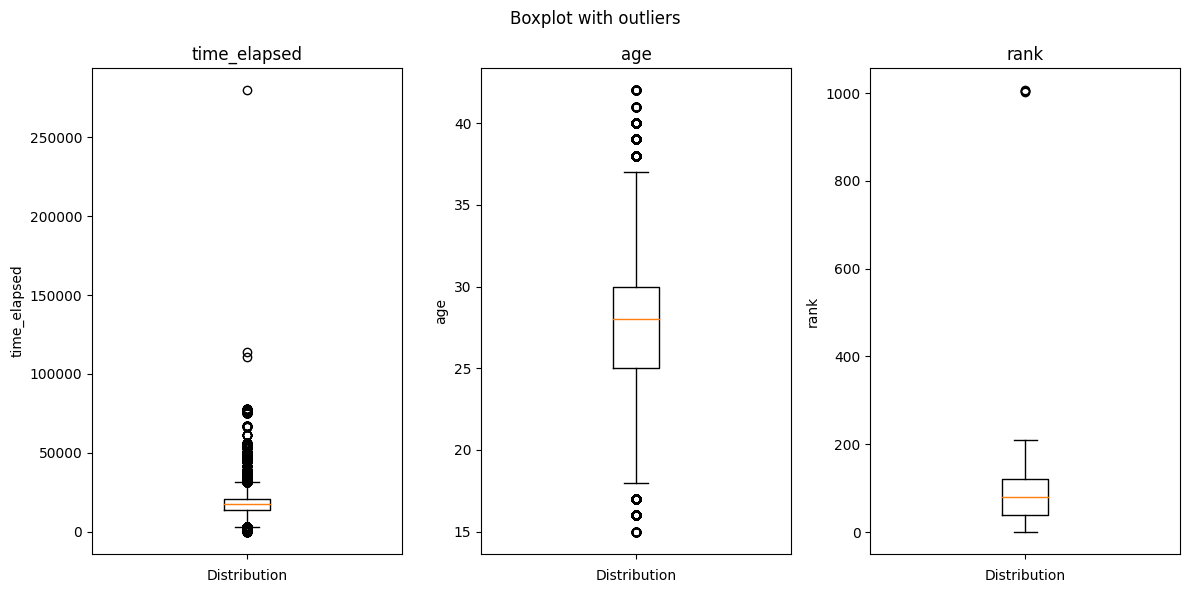

In [47]:
selected_columns = results[['time_elapsed', 'age', 'rank']]

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns.columns), figsize=(12, 6))

# Create box plots for each column
for i, column in enumerate(selected_columns):
    axes[i].boxplot(selected_columns[column])
    axes[i].set_title(f"{column}")
    axes[i].set_ylabel(column)
    axes[i].set_xlabel("Distribution")
    axes[i].set_xticklabels([""])

# Adjust the layout and display the figure
plt.suptitle('Boxplot with outliers')
plt.tight_layout()
plt.savefig('boxplot_one.png', bbox_inches='tight')
plt.show()


In [48]:
new_results = results[(results['time_elapsed'] < 30000) & (results['rank'] < 250)]

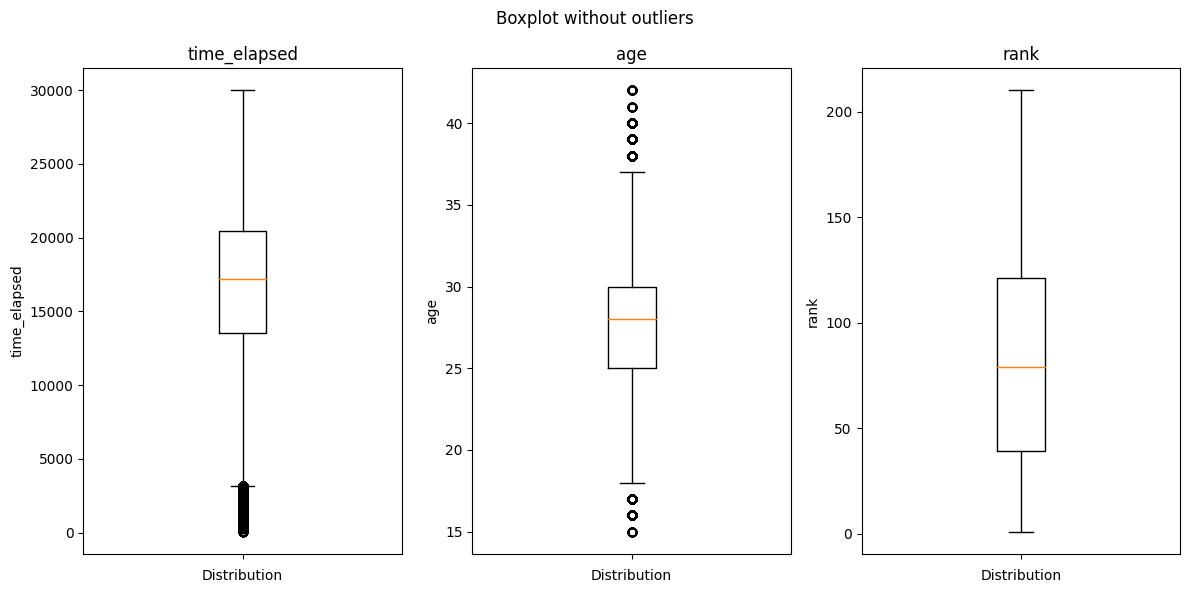

In [49]:
selected_columns = new_results[['time_elapsed', 'age', 'rank']]

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns.columns), figsize=(12, 6))

# Create box plots for each column
for i, column in enumerate(selected_columns):
    axes[i].boxplot(selected_columns[column])
    axes[i].set_title(f"{column}")
    axes[i].set_ylabel(column)
    axes[i].set_xlabel("Distribution")
    axes[i].set_xticklabels([""])

# Adjust the layout and display the figure
plt.suptitle('Boxplot without outliers')
plt.tight_layout()
plt.savefig('boxplot_two.png', bbox_inches='tight')
plt.show()

In [50]:
stages.tail(10)

,year,stage_number,Distance,Origin,Destination,Type
stage_ID,,,,,,
19043,1904,3,424.0,Marseille,Toulouse,Flat stage
19044,1904,4,268.0,Toulouse,Bordeaux,Flat stage
19045,1904,5,425.0,Bordeaux,Nantes,Flat stage
19046,1904,6,471.0,Nantes,Paris,Flat stage
19031,1903,1,467.0,Paris,Lyon,Flat stage
19032,1903,2,374.0,Lyon,Marseille,Mountain stage
19033,1903,3,423.0,Marseille,Toulouse,Flat stage
19034,1903,4,268.0,Toulouse,Bordeaux,Flat stage
19035,1903,5,425.0,Bordeaux,Nantes,Flat stage


In [51]:
#Group stages by year and calculate the percentage of stage types in each year
grouped_stages = stages.groupby('year').agg({'Type': 'value_counts'})
grouped_stages = grouped_stages.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(level=0, drop=True)
grouped_stages

C:\Users\woute\AppData\Local\Temp\ipykernel_21664\1600824211.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  grouped_stages = grouped_stages.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(level=0, drop=True)


Type
year Type                            
1903 Flat stage             83.333333
     Mountain stage         16.666667
1904 Flat stage             83.333333
     Mountain stage         16.666667
1905 Flat stage             81.818182
...                               ...
2022 Flat stage             42.857143
     Individual time trial   4.761905
2023 Mountain stage         52.380952
     Flat stage             38.095238
     Individual time trial   9.523810

[329 rows x 1 columns]

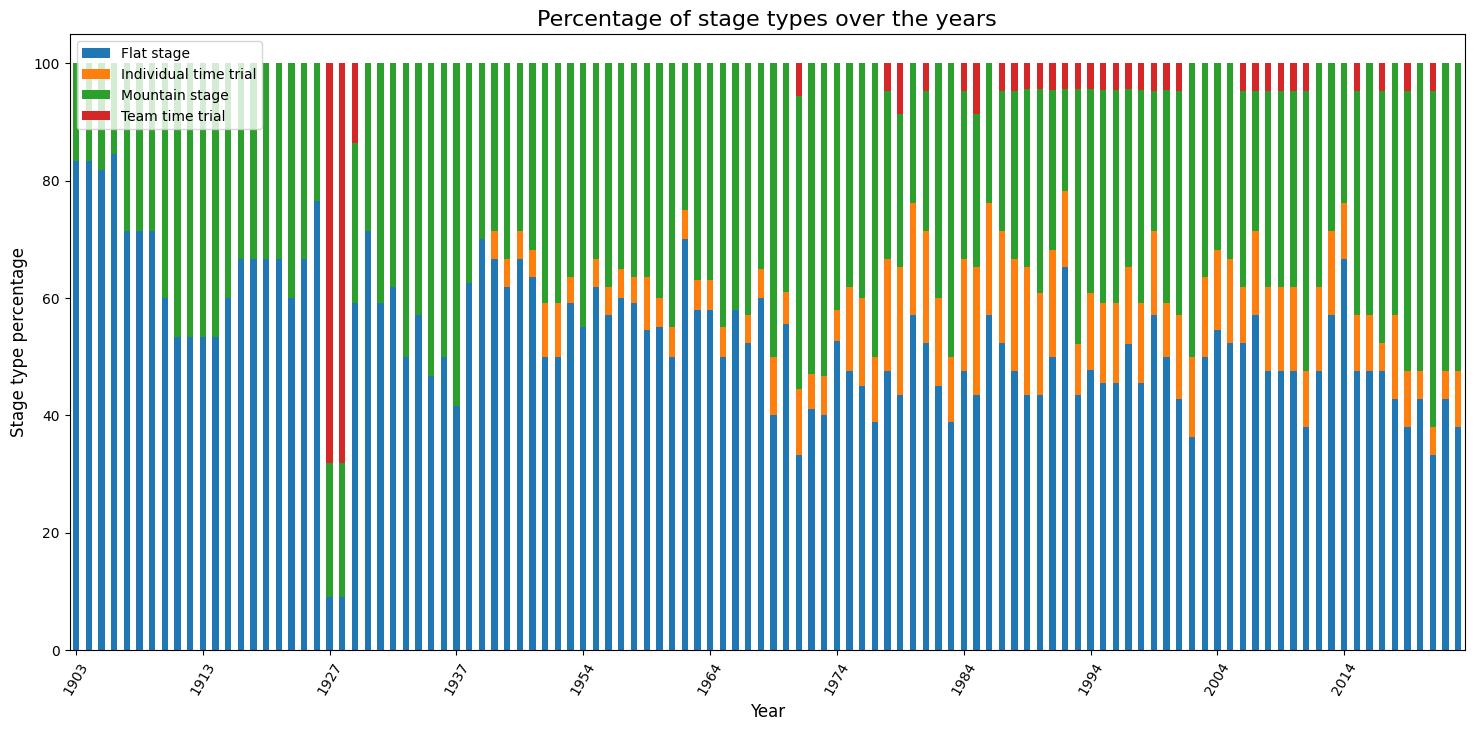

In [52]:
#Plot the percentage of stage types over the years
grouped_stages.unstack().plot(kind='bar', stacked=True, figsize=(18, 8))
plt.title('Percentage of stage types over the years', fontsize=16)
plt.xlabel('Year')
#Set x ticks to be the years and show every 10th year
plt.xticks(np.arange(0, len(grouped_stages.unstack().index), 10), grouped_stages.unstack().index[::10].tolist(), rotation=60)
plt.ylabel('Stage type percentage', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(labels=['Flat stage', "Individual time trial", "Mountain stage", "Team time trial"])
plt.savefig('stage_type_percentage.png', bbox_inches='tight')

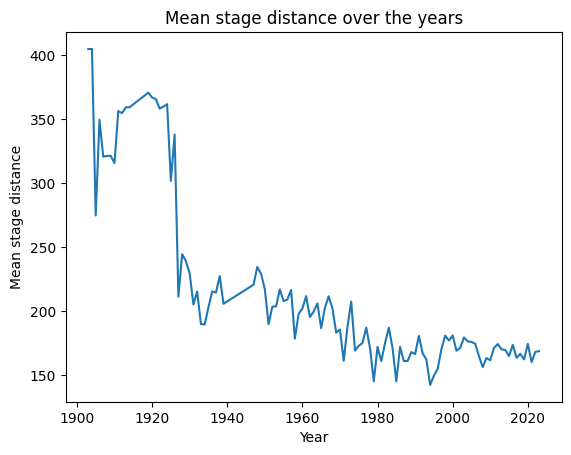

In [53]:
#Compute mean stage distance for each year
grouped_stages = stages.groupby('year').agg({'Distance': 'mean'})
plt.plot(grouped_stages.index, grouped_stages['Distance'])
plt.xlabel('Year')
plt.ylabel('Mean stage distance')
plt.title('Mean stage distance over the years')
plt.savefig('mean_stage_distance.png', bbox_inches='tight')

In [54]:
last_5_years = new_results['year'].unique()[-5:]
last_5_df = new_results[new_results['year'].isin(last_5_years)]
last_5_df['year'].unique()


array([2019, 2020, 2021, 2022, 2023])

In [55]:
best_teams = last_5_df[last_5_df['rank']<= 3]
best_teams_grouped = best_teams.groupby('team').count()['year'].sort_values(ascending=False)
best_teams_grouped

team
Team Katusha                          19
Movistar Team                         18
Team Sky                              16
Astana Pro Team                       16
AG2R La Mondiale                      15
Omega Pharma - Quick-Step             15
Lotto Soudal                          14
Tinkoff - Saxo                        14
Team Dimension Data                   13
Tinkoff                               13
Etixx - Quick Step                    11
BMC Racing Team                       10
Team Sunweb                            8
Cannondale Pro Cycling Team            8
Quick-Step Floors                      7
Team Giant - Shimano                   7
Sky Procycling                         7
IAM Cycling                            6
Team Giant - Alpecin                   6
Team Argos - Shimano                   6
Team LottoNL-Jumbo                     5
Cannondale                             5
FDJ.fr                                 5
FDJ                                    5
Garmin Shar

In [56]:
#Best teams in the last 5 years, meeste podiumplaatsen, top 12
best_teams_grouped_teamrank = best_teams.groupby(['team', 'rank'])['year'].count()
best_teams_grouped_teamrank.fillna(0, inplace=True)
best_teams_ranking = best_teams_grouped_teamrank.unstack().fillna(0)
best_teams_ranking = best_teams_ranking.loc[best_teams_ranking.sum(axis=1).sort_values(ascending=False).index[:12]]
best_teams_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Team Katusha to BMC Racing Team
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1.0     12 non-null     float64
 1   2.0     12 non-null     float64
 2   3.0     12 non-null     float64
dtypes: float64(3)
memory usage: 384.0+ bytes


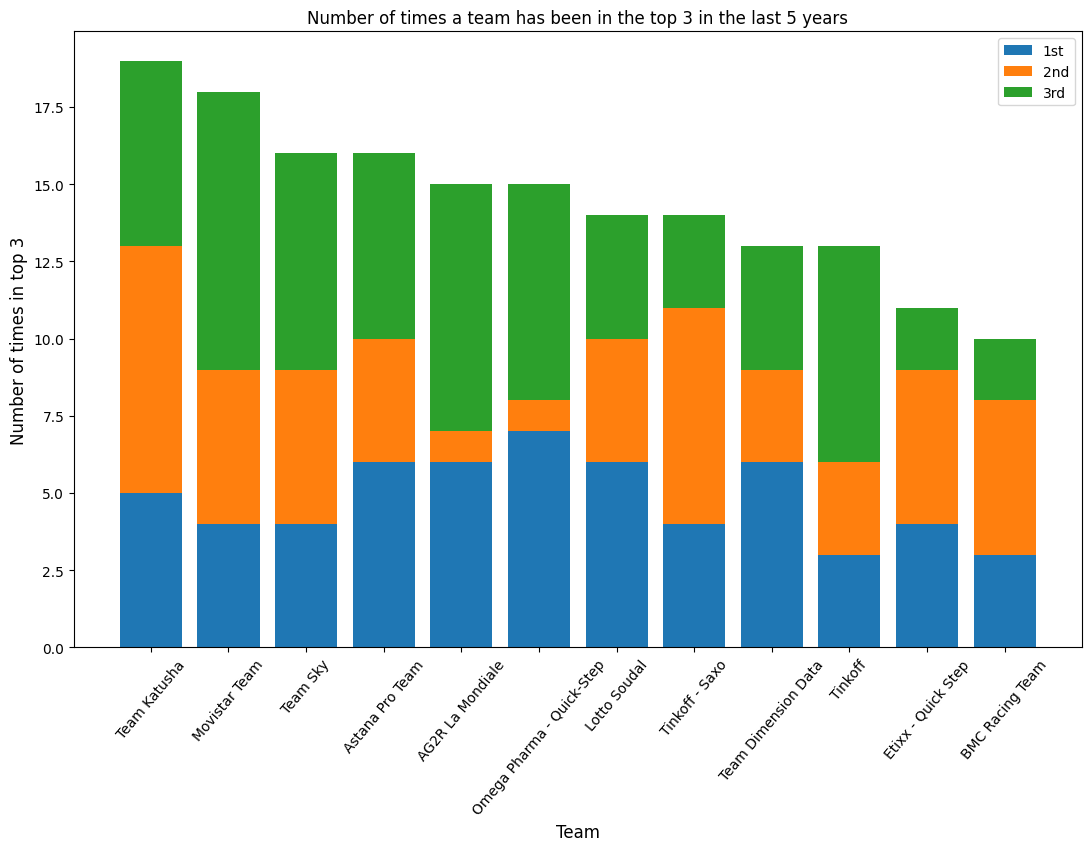

In [57]:
#Plot best teams ranking with stacked bar plot
plt.figure(figsize=(13, 8))
plt.bar(best_teams_ranking.index, best_teams_ranking[1], label='1st')
plt.bar(best_teams_ranking.index, best_teams_ranking[2], bottom=best_teams_ranking[1], label='2nd')
plt.bar(best_teams_ranking.index, best_teams_ranking[3], bottom=best_teams_ranking[1]+best_teams_ranking[2], label='3rd')
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of times in top 3', fontsize=12)
plt.title('Number of times a team has been in the top 3 in the last 5 years')
plt.legend()
plt.xticks(rotation=50, fontsize=10)
plt.savefig('top_3_teams_stacked.png', bbox_inches='tight')
plt.show()


In [58]:
new_results.head(3)

,stage_ID,edition,year,stage_number,rank,rider,age,team,time_elapsed
95262,19801,67,1980,1,1.0,Bernard Hinault,19.0,Renault - Gitane - Campagnolo,553.0
95263,19801,67,1980,1,2.0,Gerrie Knetemann,23.0,TI Raleigh - Creda,558.0
95264,19801,67,1980,1,3.0,Bert Oosterbosch,16.0,TI Raleigh - Creda,570.0


In [59]:
#recent_years: Laatste 14 jaar, top 3 teams, best 20 teams
recent_years = new_results['year'].unique()[-14:]
recent_years_df = new_results[new_results['year'].isin(recent_years)]
recent_years_df['year'].unique()
recent_years_df = recent_years_df[recent_years_df['rank']<= 3]
best_20_teams = recent_years_df.value_counts("team").index[:20]
recent_years_df = recent_years_df[recent_years_df['team'].isin(best_20_teams)]
recent_years_df['age'] = recent_years_df['age'].astype(int)

In [69]:
#Recent years, laatste 2 jaar, top 5 teams, best 20 teams
recent_years = new_results['year'].unique()[-2:]
recent_years_df = new_results[new_results['year'].isin(recent_years)]
recent_years_df['year'].unique()
recent_years_df = recent_years_df[recent_years_df['rank']<= 5]
best_20_teams = recent_years_df.value_counts("team").index[:20]
recent_years_df = recent_years_df[recent_years_df['team'].isin(best_20_teams)]
recent_years_df['age'] = recent_years_df['age'].astype(int)

#Group by team and calculate age distributions
grouped_age = recent_years_df.groupby('team')['age'].value_counts(normalize=True).unstack()
grouped_age = grouped_age.fillna(0)

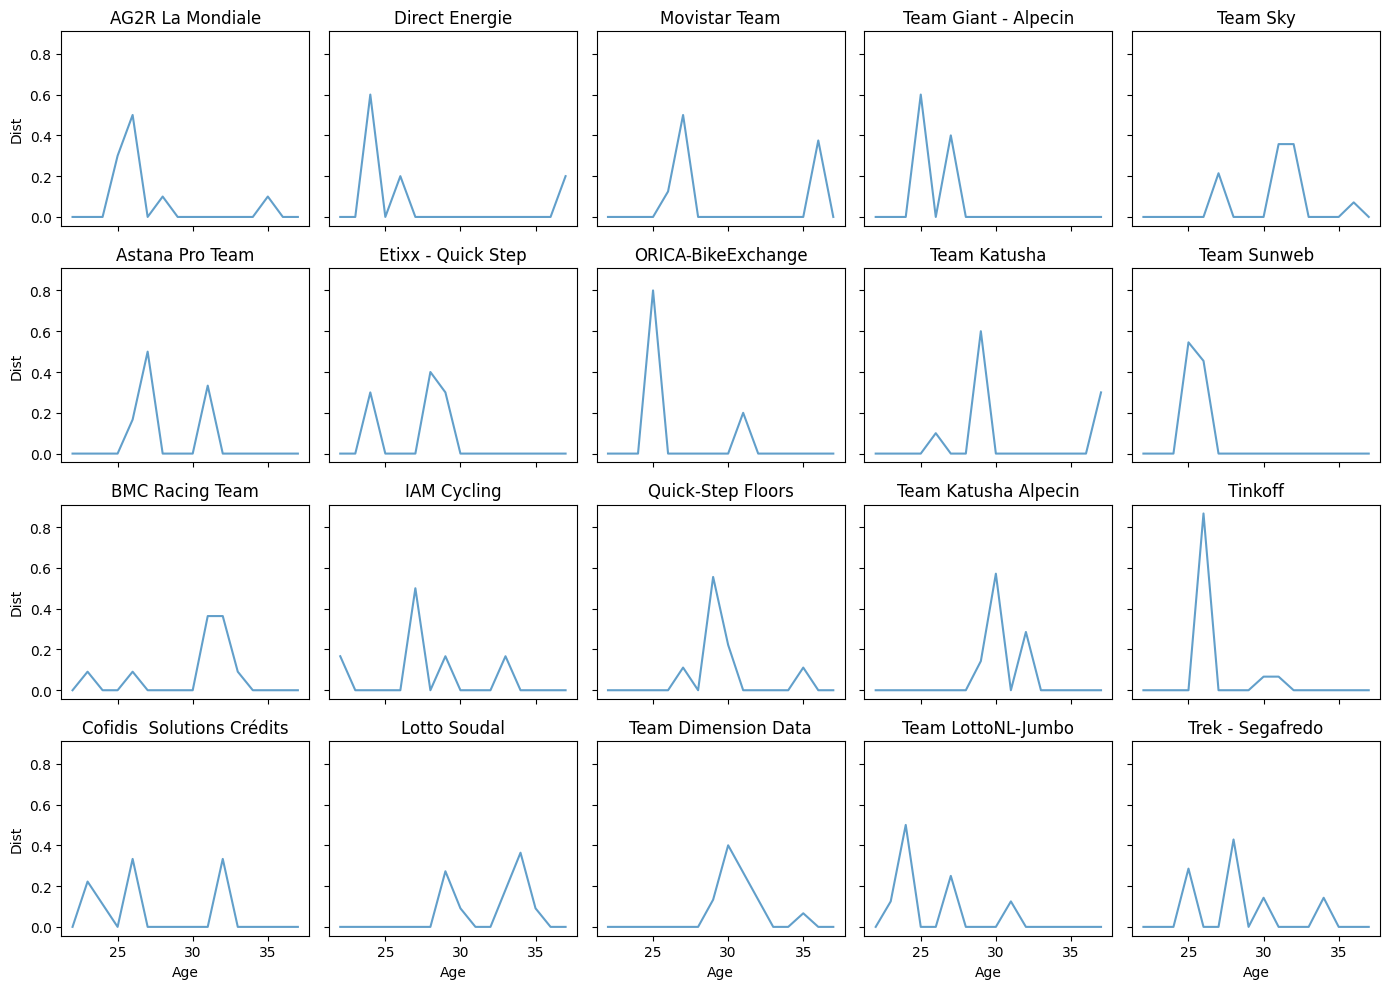

In [70]:
#Plot met distributies van beste 20 teams in laatste 2 jaar
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(14, 10), sharex=True, sharey=True)
j = 0
# Iterate over the teams
for i, team in enumerate(grouped_age.index):
    if i%4 == 0:
        if i != 0:
            j += 1
    # Get the age distribution for the team
    team_age_dist = grouped_age.loc[team]
    
    # Extract the ages and their corresponding percentages
    ages = team_age_dist.index
    percentages = team_age_dist.values
    
    # Plot the histogram for the team
    # ax.hist(ages, bins=len(ages), weights=percentages, label=team, alpha=0.7)
    ax[i%4,j].plot(ages, percentages, label=team, alpha=0.7)
    ax[i%4,j].set_title(team, fontsize=12)
    
    if i < 4:
        ax[i%4,j].set_ylabel('Dist')
    if i%4 == 3:    
        ax[i%4,j].set_xlabel('Age')

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig('age_distribution.png', bbox_inches='tight')
plt.show()

In [71]:
best_teams_ranking

rank,1.0,2.0,3.0
team,,,
Team Katusha,5.0,8.0,6.0
Movistar Team,4.0,5.0,9.0
Team Sky,4.0,5.0,7.0
Astana Pro Team,6.0,4.0,6.0
AG2R La Mondiale,6.0,1.0,8.0
Omega Pharma - Quick-Step,7.0,1.0,7.0
Lotto Soudal,6.0,4.0,4.0
Tinkoff - Saxo,4.0,7.0,3.0
Team Dimension Data,6.0,3.0,4.0


In [72]:
#10 jongste van de beste teams van afgelopen 2 jaar
best_young_teams = recent_years_df.groupby('team').agg({'age': 'mean'}).sort_values('age', ascending=True)[:12].index
print(best_young_teams)
#Combi van jongste teams en beste teams van afgelopenm 5 jaar
best_teams_ranking_young = best_teams_ranking[best_teams_ranking.index.isin(best_young_teams)]
best_teams_ranking_young

Index(['Team Sunweb', 'Team LottoNL-Jumbo', 'Team Giant - Alpecin',
       'ORICA-BikeExchange', 'Tinkoff', 'AG2R La Mondiale', 'Direct Energie',
       'Etixx - Quick Step', 'Cofidis  Solutions Crédits', 'IAM Cycling',
       'Astana Pro Team', 'Trek - Segafredo'],
      dtype='object', name='team')


rank,1.0,2.0,3.0
team,,,
Astana Pro Team,6.0,4.0,6.0
AG2R La Mondiale,6.0,1.0,8.0
Tinkoff,3.0,3.0,7.0
Etixx - Quick Step,4.0,5.0,2.0


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (12,).

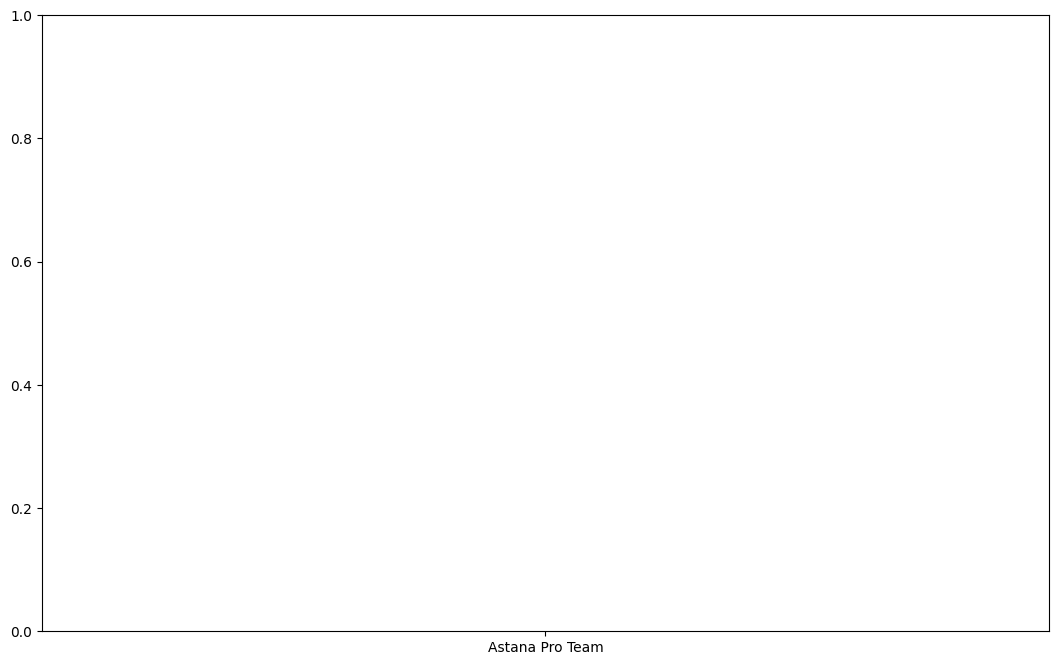

In [73]:
#Plot best teams ranking with stacked bar plot
plt.figure(figsize=(13, 8))
plt.bar(best_teams_ranking_young.index, best_teams_ranking[1], label='1st')
plt.bar(best_teams_ranking_young.index, best_teams_ranking[2], bottom=best_teams_ranking_young[1], label='2nd')
plt.bar(best_teams_ranking_young.index, best_teams_ranking[3], bottom=best_teams_ranking_young[1]+best_teams_ranking_young[2], label='3rd')
plt.xlabel('Team')
plt.ylabel('Number of times in top 3')
plt.title('Number of times a young team has been in the top 3 in the last 5 years')
plt.legend()
plt.xticks(rotation=50, fontsize=12)
plt.savefig('top_3_young_teams_stacked.png', bbox_inches='tight')
plt.show()

In [74]:
recent_years = new_results['year'].unique()[-5:]
recent_years_df = new_results[new_results['year'].isin(recent_years)]

rank_10 = recent_years_df[recent_years_df['rank']<=10]
rank_10['age'] = rank_10['age'].astype(int)
rank_10.head()

C:\Users\woute\AppData\Local\Temp\ipykernel_21664\3109500068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_10['age'] = rank_10['age'].astype(int)


,stage_ID,edition,year,stage_number,rank,rider,age,team,time_elapsed
220544,20191,106,2019,1,1.0,Marcel Kittel,25,Team Argos - Shimano,17812.0
220545,20191,106,2019,1,2.0,Alexander Kristoff,25,Team Katusha,17812.0
220546,20191,106,2019,1,3.0,Danny Poppel van,19,Vacansoleil - DCM,17812.0
220547,20191,106,2019,1,4.0,David Millar,36,Garmin Sharp,17812.0
220548,20191,106,2019,1,5.0,Matteo Trentin,23,Omega Pharma - Quick-Step,17812.0


In [75]:
rank_10_young_best = rank_10[rank_10['team'].isin(best_young_teams)]
rank_10_grouped_age = rank_10_young_best.groupby(['team', 'year']).count()['rank']
rank_10_grouped_age = rank_10_grouped_age.unstack(level=0).fillna(0)
rank_10_grouped_age.index = rank_10_grouped_age.index.astype(int)
rank_10_grouped_age = rank_10_grouped_age.drop(["Team Sunweb", "Tinkoff"], axis=1)
rank_10_grouped_age

team,AG2R La Mondiale,Astana Pro Team,Cofidis Solutions Crédits,Direct Energie,Etixx - Quick Step,IAM Cycling,ORICA-BikeExchange,Team Giant - Alpecin,Team LottoNL-Jumbo,Trek - Segafredo
year,,,,,,,,,,
2019,9.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,21.0,11.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
2021,9.0,5.0,5.0,0.0,13.0,3.0,0.0,13.0,6.0,0.0
2022,9.0,6.0,11.0,7.0,16.0,12.0,11.0,5.0,9.0,10.0
2023,7.0,9.0,8.0,5.0,0.0,0.0,0.0,0.0,12.0,10.0


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
[0.18, 1.18, 2.18, 3.18, 4.18, 5.18, 6.18, 7.18, 8.18, 9.18]
[0.36, 1.3599999999999999, 2.36, 3.36, 4.36, 5.36, 6.36, 7.36, 8.36, 9.36]
[0.54, 1.54, 2.54, 3.54, 4.54, 5.54, 6.54, 7.54, 8.54, 9.54]
[0.72, 1.72, 2.7199999999999998, 3.7199999999999998, 4.72, 5.72, 6.72, 7.72, 8.72, 9.72]


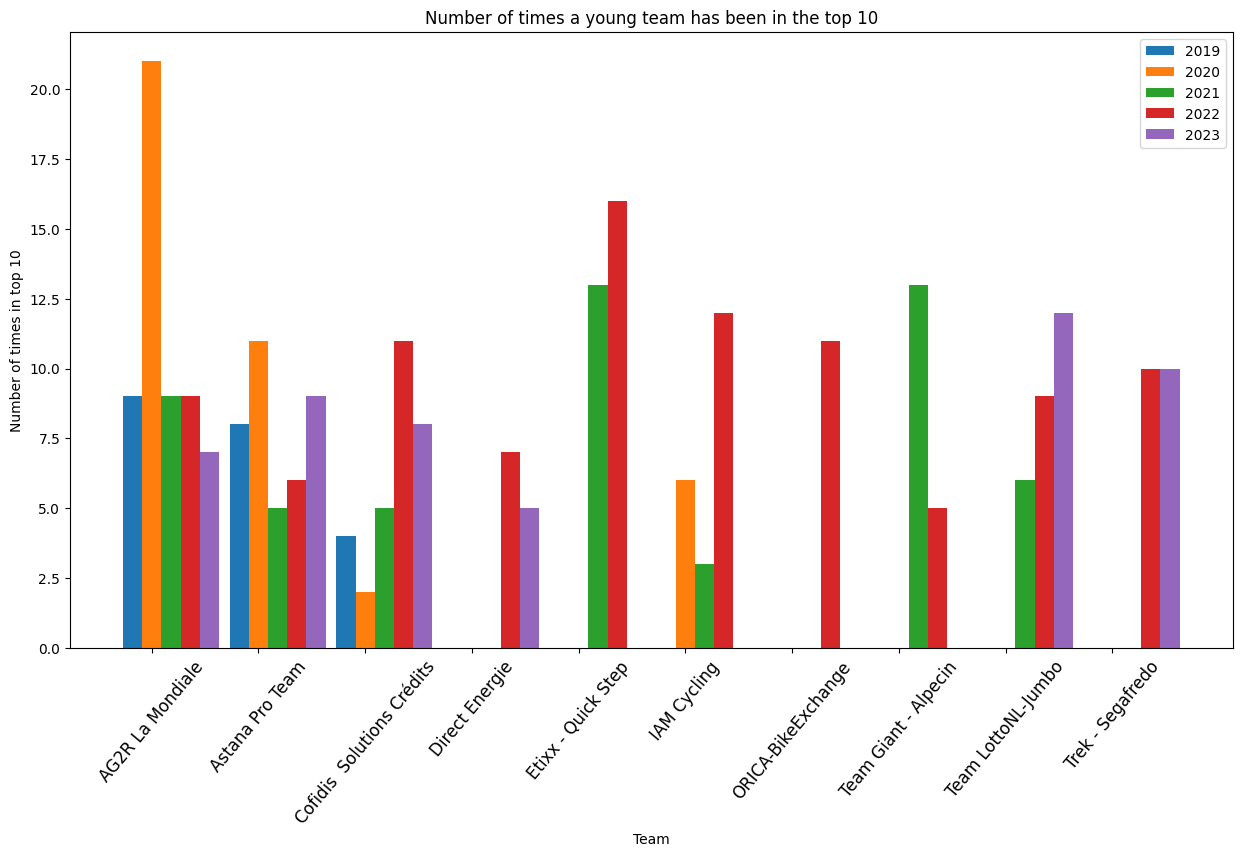

In [77]:
#Plot best teams ranking with stacked bar plot
br1 = np.arange(len(rank_10_grouped_age.columns))

barwidth = 0.18

plt.figure(figsize=(15, 8))

for i ,team in enumerate(rank_10_grouped_age.index):
    br = [x + barwidth*i for x in br1]
    print(br)
    plt.bar(br, rank_10_grouped_age.loc[team], label=team, width=barwidth)
    
plt.xlabel('Team')
plt.ylabel('Number of times in top 10')
plt.title('Number of times a young team has been in the top 10')
plt.legend()
plt.xticks([r + barwidth for r in range(len(rank_10_grouped_age.columns))], 
           rank_10_grouped_age.columns, rotation=50, fontsize=12)
plt.savefig('top10podium_young_teams', bbox_inches='tight')
plt.show()

In [ ]:
recent_years_df[recent_years_df['team']=='Team Saxo - Tinkoff']

,stage_ID,edition,year,stage_number,rank,rider,age,team,time_elapsed
220557,20191,106,2019,1,14,Nicolas Roche,28,Team Saxo - Tinkoff,17812
220569,20191,106,2019,1,26,Roman Kreuziger,27,Team Saxo - Tinkoff,17812
220638,20191,106,2019,1,95,Benjamín Noval,34,Team Saxo - Tinkoff,17812
220657,20191,106,2019,1,114,Michael Rogers,33,Team Saxo - Tinkoff,17812
220669,20191,106,2019,1,126,Daniele Bennati,32,Team Saxo - Tinkoff,17812
...,...,...,...,...,...,...,...,...,...
224321,201921,106,2019,21,78,Michael Rogers,33,Team Saxo - Tinkoff,11184
224335,201921,106,2019,21,92,Miguel Sérgio Paulinho,33,Team Saxo - Tinkoff,11184
224347,201921,106,2019,21,104,Matteo Tosatto,39,Team Saxo - Tinkoff,11208
224365,201921,106,2019,21,122,Nicolas Roche,29,Team Saxo - Tinkoff,11215
